In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 1. Ler o arquivo CSV
df = pd.read_csv("pacientes.csv")

In [6]:
# Visualiza as primeiras linhas
print(df.head())

   ID    Nome  Idade Genero  Peso  Glicose  Pressao  Mes
0   1    João     34      M    80     95.0    120.0  Jan
1   2     Ana     45      F    72    110.0    130.0  Jan
2   3   Pedro     51      M    90      NaN    140.0  Fev
3   4  Cassio     29      M    60     88.0    115.0  Fev
4   5  Carlos     63      M    85      NaN    150.0  Mar


In [7]:
print("=" * 60)
print("ANÁLISE DE PACIENTES - CLÍNICA DE SAÚDE")
print("=" * 60)
print(f"\nTotal de pacientes: {len(df)}")
print(f"\nValores nulos antes do tratamento:")
print(df.isnull().sum())

ANÁLISE DE PACIENTES - CLÍNICA DE SAÚDE

Total de pacientes: 70

Valores nulos antes do tratamento:
ID         0
Nome       0
Idade      0
Genero     0
Peso       0
Glicose    8
Pressao    5
Mes        0
dtype: int64


In [8]:
# 2. Tratar valores nulos
# Substituir valores nulos pela média
df['Glicose'] = df['Glicose'].fillna(df['Glicose'].mean())
df['Pressao'] = df['Pressao'].fillna(df['Pressao'].mean())

In [9]:
print(f"\nValores nulos após o tratamento:")
print(df.isnull().sum())


Valores nulos após o tratamento:
ID         0
Nome       0
Idade      0
Genero     0
Peso       0
Glicose    0
Pressao    0
Mes        0
dtype: int64


In [10]:
# Criar faixas etárias
def classificar_faixa_etaria(idade):
    if idade <= 30:
        return '20-30'
    elif idade <= 40:
        return '31-40'
    elif idade <= 50:
        return '41-50'
    elif idade <= 60:
        return '51-60'
    else:
        return '61+'

In [11]:

df['Faixa_Etaria'] = df['Idade'].apply(classificar_faixa_etaria)

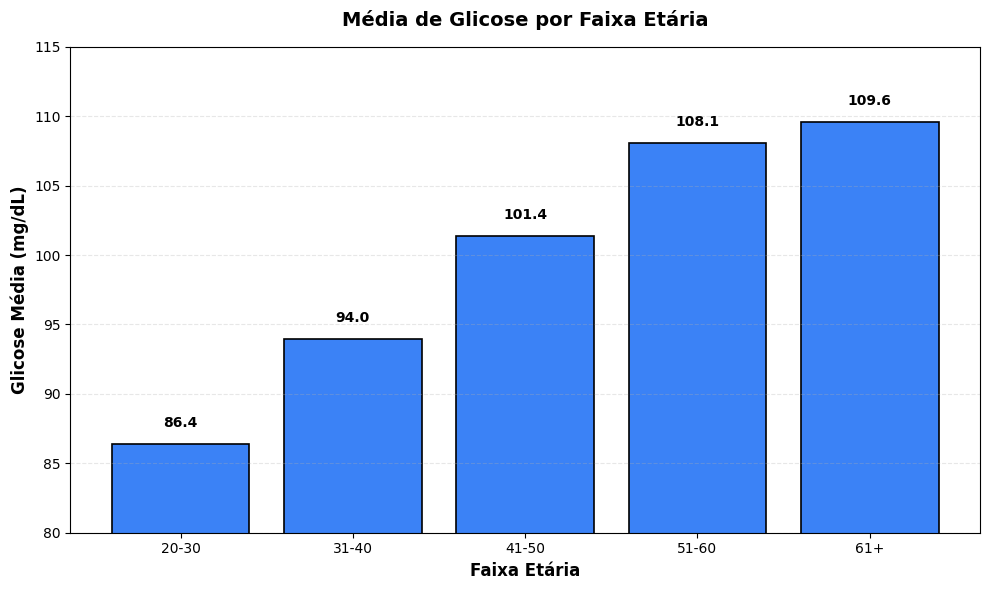

In [16]:
# 3. Gerar os gráficos

# GRÁFICO 1: Barras - Média de glicose por faixa etária
plt.figure(figsize=(10, 6))
glicose_por_faixa = df.groupby('Faixa_Etaria')['Glicose'].mean().reindex(['20-30', '31-40', '41-50', '51-60', '61+'])

plt.bar(glicose_por_faixa.index, glicose_por_faixa.values, color='#3b82f6', edgecolor='black', linewidth=1.2)
plt.xlabel('Faixa Etária', fontsize=12, fontweight='bold')
plt.ylabel('Glicose Média (mg/dL)', fontsize=12, fontweight='bold')
plt.title('Média de Glicose por Faixa Etária', fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(80, 115)

# Adicionar valores nas barras
for i, v in enumerate(glicose_por_faixa.values):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


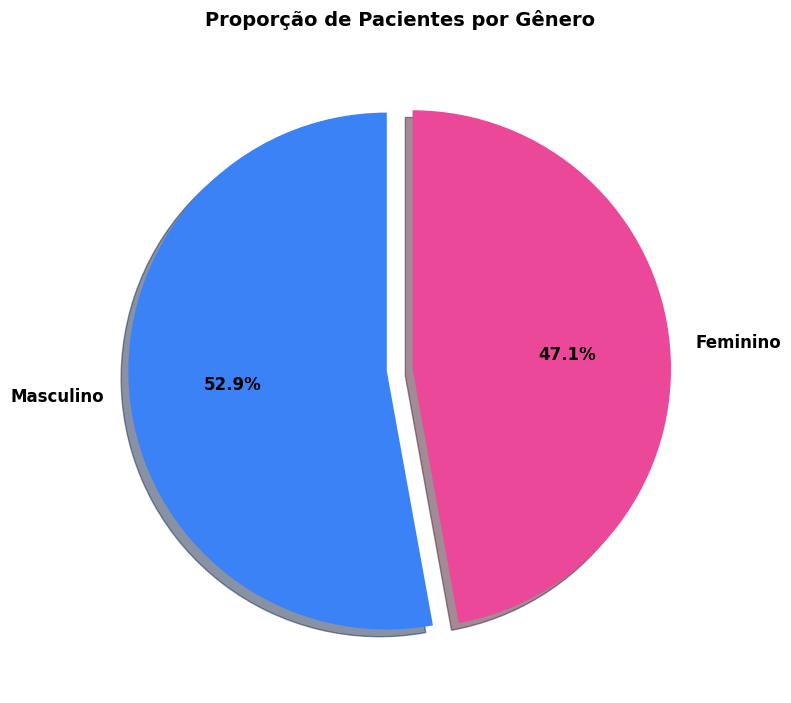

In [17]:
# GRÁFICO 2: Pizza - Proporção de pacientes por gênero
plt.figure(figsize=(8, 8))
genero_count = df['Genero'].value_counts()
cores = ['#3b82f6', '#ec4899']
explode = (0.05, 0.05)

plt.pie(genero_count.values, labels=['Masculino', 'Feminino'], autopct='%1.1f%%',
        colors=cores, explode=explode, shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Proporção de Pacientes por Gênero', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1605422479.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pressao_por_mes = df.groupby('Mes')['Pressao'].mean()


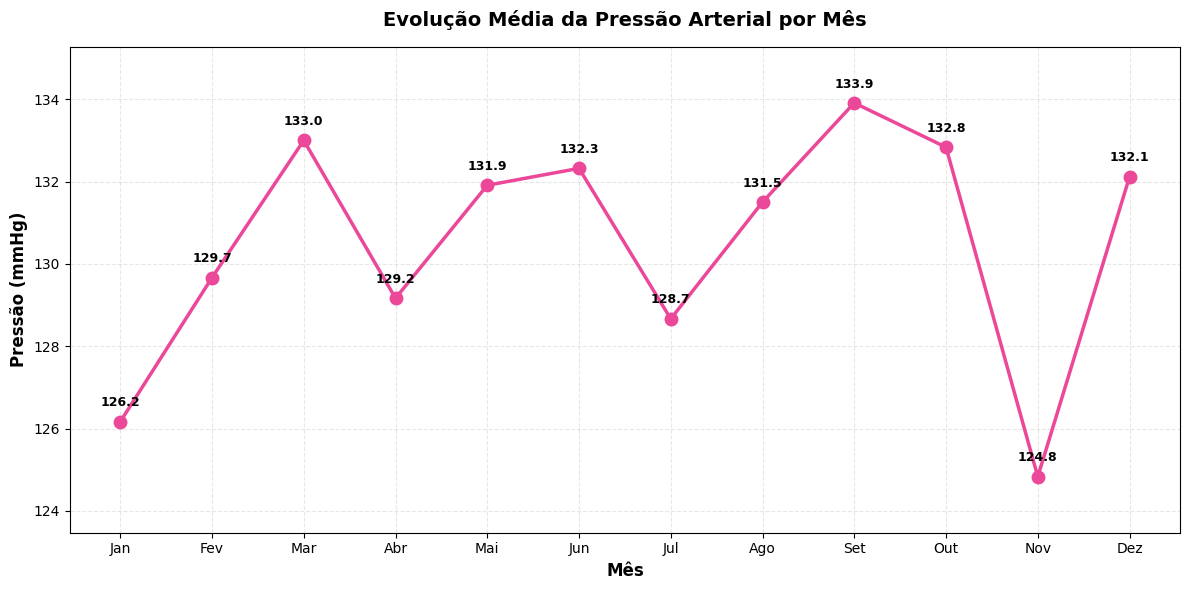

In [21]:
# GRÁFICO 3: Linhas - Evolução média da pressão arterial por mês
plt.figure(figsize=(12, 6))
ordem_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
df['Mes'] = pd.Categorical(df['Mes'], categories=ordem_meses, ordered=True)
pressao_por_mes = df.groupby('Mes')['Pressao'].mean()

plt.plot(pressao_por_mes.index, pressao_por_mes.values, marker='o', linewidth=2.5,
         markersize=8, color='#ec4899', markerfacecolor='#ec4899', markeredgewidth=2)
plt.xlabel('Mês', fontsize=12, fontweight='bold')
plt.ylabel('Pressão (mmHg)', fontsize=12, fontweight='bold')
plt.title('Evolução Média da Pressão Arterial por Mês', fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, linestyle='--')

# Ajustar os limites do eixo Y para melhor visualização
min_pressao = pressao_por_mes.min()
max_pressao = pressao_por_mes.max()
margem = (max_pressao - min_pressao) * 0.15
plt.ylim(min_pressao - margem, max_pressao + margem)

# Adicionar valores em TODOS os pontos
for i, (mes, valor) in enumerate(zip(pressao_por_mes.index, pressao_por_mes.values)):
    plt.text(i, valor + 0.3, f'{valor:.1f}', ha='center', va='bottom',
            fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()



In [19]:
print("\n" + "=" * 60)
print("CONCLUSÕES DA ANÁLISE")
print("=" * 60)
print("\n✓ Faixas etárias mais altas apresentam glicose média maior")
print("  → Tendência crescente observada: 20-30 anos até 61+")
print(f"\n✓ Distribuição de gênero está equilibrada")
print(f"  → Masculino: {genero_count['M']/len(df)*100:.1f}% | Feminino: {genero_count['F']/len(df)*100:.1f}%")
print("\n✓ Pressão arterial apresenta variações ao longo do ano")
print(f"  → Média geral: {df['Pressao'].mean():.2f} mmHg")
print("\n" + "=" * 60)


CONCLUSÕES DA ANÁLISE

✓ Faixas etárias mais altas apresentam glicose média maior
  → Tendência crescente observada: 20-30 anos até 61+

✓ Distribuição de gênero está equilibrada
  → Masculino: 52.9% | Feminino: 47.1%

✓ Pressão arterial apresenta variações ao longo do ano
  → Média geral: 130.46 mmHg

